In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
# Dataset Path
dataset_path = '/kaggle/input/steganography'

In [5]:
# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 3910 images belonging to 2 classes.
Found 976 images belonging to 2 classes.


In [6]:
# AlexNet-Inspired CNN Model
model = models.Sequential([
    layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', kernel_regularizer=regularizers.l2(1e-4), input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Conv2D(256, (5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

     layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(2, activation='softmax')  # 2-class classification
])


In [7]:
# Compile
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 91s 663ms/step - accuracy: 0.5557 - loss: 2.4225 - val_accuracy: 0.5287 - val_loss: 0.7056 - learning_rate: 1.0000e-04
Epoch 2/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 93s 722ms/step - accuracy: 0.5735 - loss: 1.3067 - val_accuracy: 0.5236 - val_loss: 0.8642 - learning_rate: 1.0000e-04
Epoch 3/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 76s 585ms/step - accuracy: 0.6420 - loss: 0.9162 - val_accuracy: 0.5328 - val_loss: 0.7110 - learning_rate: 1.0000e-04
Epoch 4/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 69s 540ms/step - accuracy: 0.6577 - loss: 0.7947 - val_accuracy: 0.6527 - val_loss: 0.6697 - learning_rate: 1.0000e-04
Epoch 5/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 76s 591ms/step - accuracy: 0.7008 - loss: 0.6627 - val_accuracy: 0.5943 - val_loss: 0.6705 - learning_rate: 1.0000e-04
Epoch 6/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 73s 569ms/step - accuracy: 0.7584 - loss: 0.5642 - val_accuracy: 0.8238 - val_loss: 0.4332 - learning_rate: 1.0000e-04
Epoch 7/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 73s 56

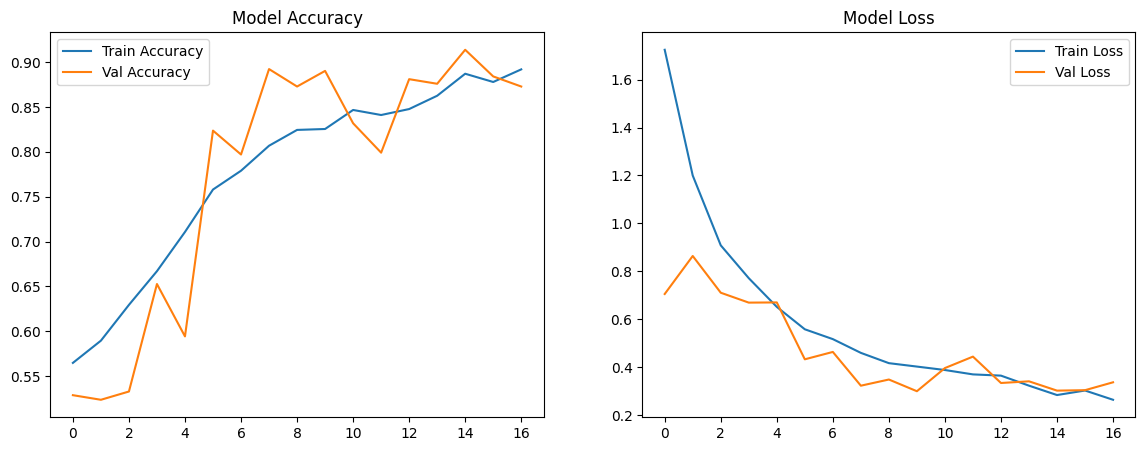


✅ Final Validation Accuracy: 0.87


In [8]:

# Plot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

# Final Validation Accuracy
val_acc = history.history['val_accuracy'][-1]
print(f"\n✅ Final Validation Accuracy: {val_acc:.2f}")

In [9]:
# Save the model
model.save('alexnet_steganography_model.keras')
print("🎉 Model saved successfully as 'alexnet_steganography_model.keras'")

🎉 Model saved successfully as 'alexnet_steganography_model.keras'


31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step


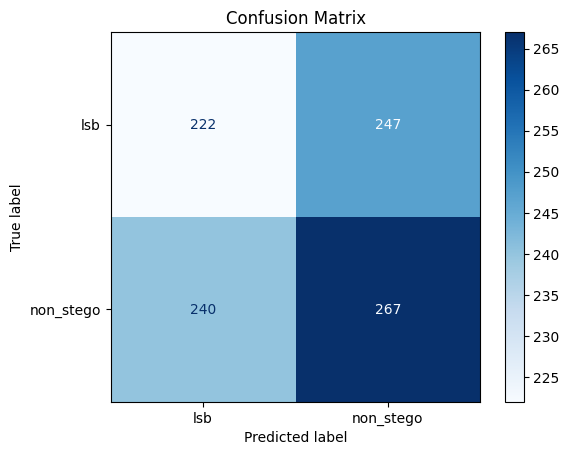

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Get true labels and predictions
val_gen.reset()
Y_pred = model.predict(val_gen, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(val_gen.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [11]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

Classification Report:

              precision    recall  f1-score   support

         lsb       0.48      0.47      0.48       469
   non_stego       0.52      0.53      0.52       507

    accuracy                           0.50       976
   macro avg       0.50      0.50      0.50       976
weighted avg       0.50      0.50      0.50       976



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


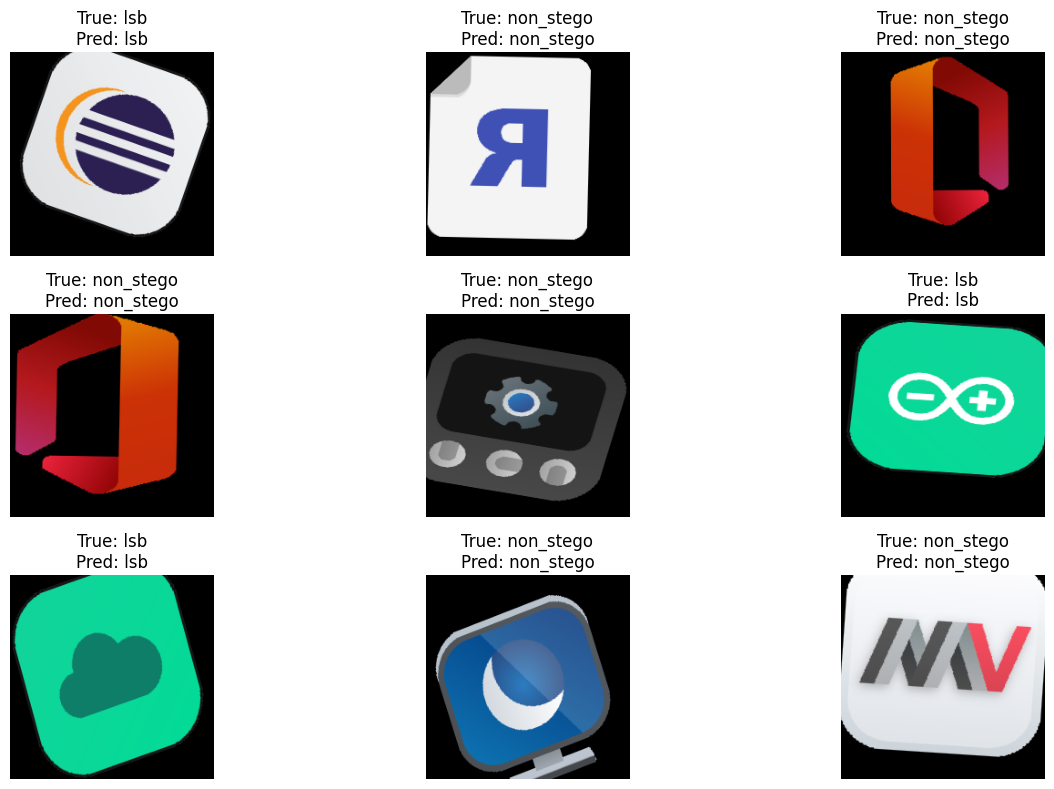

In [12]:
import matplotlib.pyplot as plt

# Get a batch of images and predictions
val_gen.reset()
x_batch, y_batch = next(val_gen)
pred_batch = model.predict(x_batch)
pred_labels = np.argmax(pred_batch, axis=1)
true_labels = np.argmax(y_batch, axis=1)

# Plot a few images
plt.figure(figsize=(14, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"True: {labels[true_labels[i]]}\nPred: {labels[pred_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


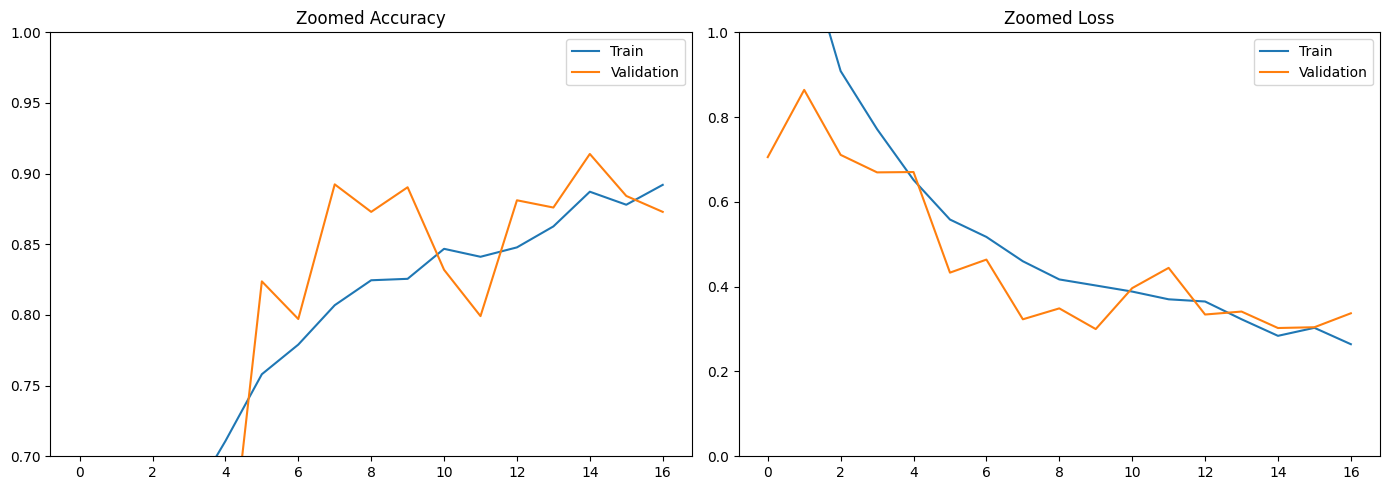

In [13]:
# Zoomed view of accuracy and loss
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Zoomed Accuracy')
plt.ylim(0.7, 1.0)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Zoomed Loss')
plt.ylim(0, 1.0)
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/input/steg_alexnet/keras/default/1/alexnet_steganography_model.keras')
print("✅ Model loaded successfully.")


✅ Model loaded successfully.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/kaggle/input/steganography'  # update path if needed

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # ❗Important: disable shuffle for correct label alignment
)


Found 976 images belonging to 2 classes.


In [5]:
loss, acc = model.evaluate(val_gen, verbose=1)
print(f"\n📊 Validation Accuracy: {acc:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.9137 - loss: 0.2515

📊 Validation Accuracy: 0.92


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image_loaded_model(model, image_path, class_indices, show=True):
    """
    Predicts the class of a given image using a pre-loaded Keras model.

    Parameters:
    - model: Keras model object (already loaded)
    - image_path: str, path to the image you want to predict
    - class_indices: dict, mapping from class names to indices (from train_gen.class_indices)
    - show: bool, if True displays the image with prediction

    Returns:
    - predicted_label: str, predicted class label
    - confidence: float, confidence score of the prediction
    """
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    pred_class = np.argmax(pred)
    confidence = pred[0][pred_class]

    # Map index to label
    index_to_label = {v: k for k, v in class_indices.items()}
    predicted_label = index_to_label[pred_class]

    # Optionally show the image
    if show:
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Predicted: {predicted_label} ({confidence*100:.2f}%)')
        plt.show()

    return predicted_label, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step


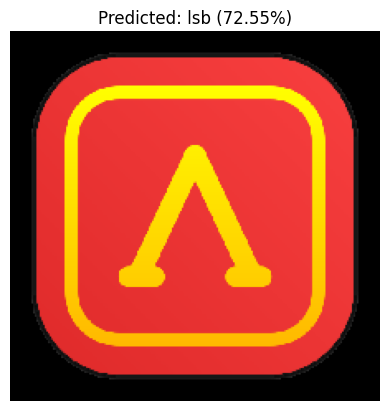

('lsb', 0.72545296)

In [13]:
# Assuming your model is already loaded as 'model'
# And class_indices is from your train_gen
class_indices = {'lsb': 0, 'non_stego': 1} 
predict_image_loaded_model(
    model=model,
    image_path='/kaggle/input/steganography/lsb/image_00002_eth_0.png',  # update path
    class_indices=class_indices
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


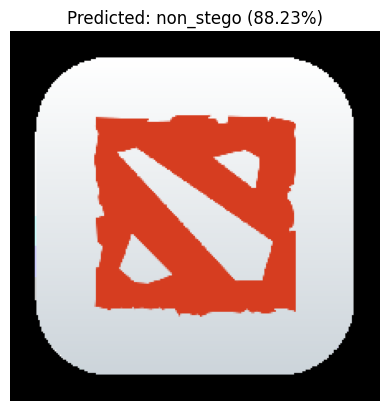

('non_stego', 0.882253)

In [16]:
# Assuming your model is already loaded as 'model'
# And class_indices is from your train_gen
class_indices = {'lsb': 0, 'non_stego': 1} 
predict_image_loaded_model(
    model=model,
    image_path='/kaggle/input/steganography/non_stego/01384.png',  # update path
    class_indices=class_indices
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Dataset Path
dataset_path = '/kaggle/input/steganography'

# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# AlexNet-Inspired CNN Model
model = models.Sequential([
    layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', kernel_regularizer=regularizers.l2(1e-4), input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Conv2D(256, (5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(384, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(2, activation='softmax')  # 2-class classification
])

# Compile
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[early_stop, lr_reduce]
)

# Plot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

# Final Validation Accuracy
val_acc = history.history['val_accuracy'][-1]
print(f"\n✅ Final Validation Accuracy: {val_acc:.2f}")

# Save the model
model.save('alexnet_steganography_model.keras')
print("🎉 Model saved successfully as 'alexnet_steganography_model.keras'")
